In [108]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

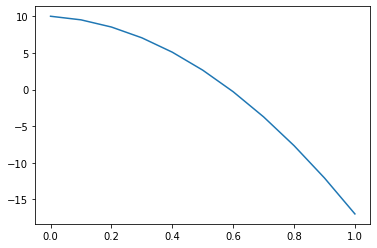

In [71]:
# Euler-Cromer in 1D

m = 5.0
dt = 0.1
t = np.arange(0, 1+dt, dt)
N = len(t)

r = np.zeros(N)
v = np.zeros(N)

r[0] = 10.0
v[0] = 0.0

def a(r,v,t, m):
    g = 9.81
    return -m*g

for i in range(N-1):
    v[i+1] = v[i] + a(r[i],v[i],t[i], m)*dt
    r[i+1] = r[i] + v[i+1]*dt
    
plt.plot(t, r)
plt.show()

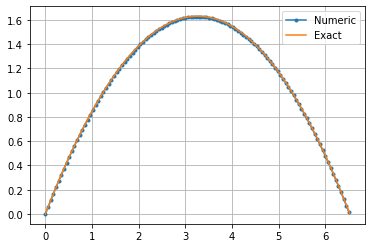

In [70]:
# Euler-Cromer in 2D (Shooting)

m = 5.0
dt = 0.001
t = np.arange(0, 1.153+dt, dt)
N = len(t)

r = np.zeros((N, 2))
v = np.zeros((N, 2))

theta = np.pi/4
v_norm = 8.0
r[0] = 0.0, 0.0
v[0] = v_norm*np.cos(theta), v_norm*np.sin(theta)

def a(r,v,t,m):
    """F/m."""
    g = 9.81
    return np.array([0.0, -m*g])/m

def exact_solution(t, v0, x0=0, y0=0):
    vx0, vy0 = v0
    g = 9.81
    x = x0 + vx0*t
    y = y0 + vy0*t - 0.5*g*t**2
    return np.array([x, y])
    

for i in range(N-1):
    v[i+1] = v[i] + a(r[i],v[i],t[i], m)*dt
    r[i+1] = r[i] + v[i+1]*dt
    
plt.plot(r[:,0][::10], r[:,1][::10], marker='.', label='Numeric')
plt.plot(exact_solution(t, v[0])[0], exact_solution(t, v[0])[1], label='Exact')
plt.grid()
plt.legend()
plt.show()

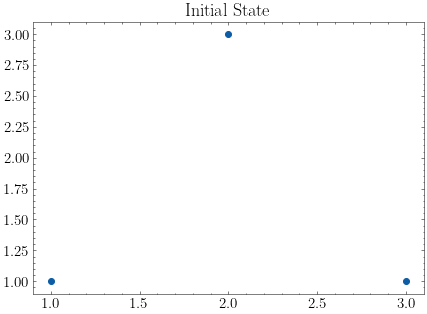

In [120]:
# Euler-Cromer in 2D for two interacting particles

dt = 0.1
t = np.arange(0, 5+dt, dt)

N_times = len(t)
N_dimensions = 2
N_particles = 3

r = np.zeros((N_times, N_particles, N_dimensions)) 
v = np.zeros((N_times, N_particles, N_dimensions))
f = np.zeros((N_times, N_particles, N_dimensions))

# Staring positions

r[0][0] = 1.0, 1.0
r[0][1] = 3.0, 1.0
r[0][2] = 2.0, 3.0

plt.plot(r[0][:,0], r[0][:,1], marker='o', ls='')
plt.title('Initial State')
plt.show()

In [143]:
def compute_forces(t, r):
    r0 = 0.5
    alpha = 0.1
    for i in range(N_particles):
        for j in range(N_particles):
            if i !=j:
                rij = r[t, i] - r[t, j]
                rij_norm = np.linalg.norm(rij)
                f[t, i] = f[t, i] - alpha*(rij_norm - r0)*rij/rij_norm
                               
for i in range(N_times-1):
    compute_forces(i, r)
    v[i+1] = v[i] + f[i]*dt
    r[i+1] = r[i] + v[i+1]*dt

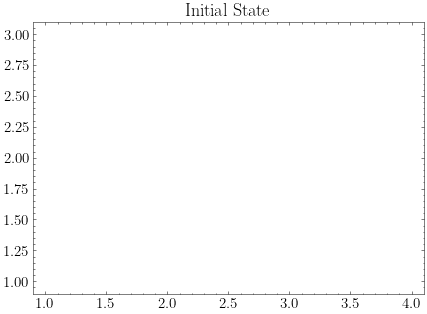

In [144]:
for i in range(N_times):
    plt.plot(r[i][:,0], r[i][:,1], marker='o', ls='')
    plt.title('Initial State')
    display.clear_output(wait=True)
    plt.xlim(0.9, 4.1)
    plt.ylim(0.9, 3.1)
    plt.show()